In [1]:
"""
Process Flow:

1. Import data into a Pandas DataFrame.
    1.1  Set dependencies
    1.2  Establish files to load
    1.3  Read files
    1.4  Exploratory Data Analysis
2. Merge DataFrames.
3. Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
4. Determine the mean, median, and mode for the following:
5. The total number of rides for each city type.
6. The average fares for each city type.
7. The total number of drivers for each city type.
8. Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
9. The number of rides for each city type.
10. The fares for each city type.
11. The number of drivers for each city type.
12. Create a pie chart that visualizes each of the following data for each city type:
13. The percent of total fares.
14. The percent of total rides.
15. The percent of total drivers.

"""

'\nProcess Flow:\n\n1. Import data into a Pandas DataFrame.\n    1.1  Set dependencies\n    1.2  Establish files to load\n    1.3  Read files\n    1.4  Exploratory Data Analysis\n2. Merge DataFrames.\n3. Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.\n4. Determine the mean, median, and mode for the following:\n5. The total number of rides for each city type.\n6. The average fares for each city type.\n7. The total number of drivers for each city type.\n8. Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:\n9. The number of rides for each city type.\n10. The fares for each city type.\n11. The number of drivers for each city type.\n12. Create a pie chart that visualizes each of the following data for each city type:\n13. The percent of total fares.\n14. The percent of total rides.\n15.

In [2]:
## 1. Set dependencies and import data into dataframes
# 1.1 Set dependencies

%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl


In [3]:
# 1.2 Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# 1.3 Read the city data and store as a DataFrame (pandas)

city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# 1.4 Eploratory Data Analysis
# 1.4.1 Get columns and rows that are not null in the City DF

city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# How many cities are there per type? 
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
sum(city_data_df["type"]=="Urban")

66

In [11]:
sum(city_data_df["type"]=="Suburban")

36

In [12]:
sum(city_data_df["type"]=="Rural")

18

In [13]:
# 1.4.2 Exploratory Data Analysis on the Riders DF
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [14]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [16]:
## 2. Merge DataFrames
# The key in the 2 dfs is the city - merge using a left join (default is inner)

pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=['city', 'city'])

# Display the df
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
"""
3. Create Bubble Chart
    Need avg fare for each type of city on y axis
    Need total number of rides on x axis
    Size of markers should be set to number of drivers per city

3.0 separate city types into 3 dfs 
3.1 get total # of rides per city using count() in ride_id column 
3.2 get avg fare using mean()
3.3 make bubble size correlate with avg driver count  
"""

'\n3. Create Bubble Chart\n    Need avg fare for each type of city on y axis\n    Need total number of rides on x axis\n    Size of markers should be set to number of drivers per city\n\n3.0 separate city types into 3 dfs \n3.1 get total # of rides per city using count() in ride_id column \n3.2 get avg fare using mean()\n3.3 make bubble size correlate with avg driver count  \n'

In [18]:
# 3.0 Setup 3 different dfs per city type
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [20]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [21]:
# 3.1 Get the number of rides per city using groupby()
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

print(urban_ride_count.head(), suburban_ride_count.head(), rural_ride_count.head())


city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64 city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64 city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


In [22]:
# 3.2 Get the avg fare per city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

print(urban_avg_fare.head(), suburban_avg_fare.head(), rural_avg_fare.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64 city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64 city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64


In [23]:
# 3.3 Find avg driver cound and make bubble chart
urban_driver_count = urban_cities_df.groupby(['city']).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(['city']).mean()["driver_count"]

print(urban_driver_count.head(), suburban_driver_count.head(), rural_driver_count.head())

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64 city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64 city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64


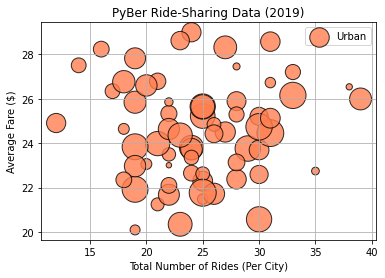

In [24]:
plt.scatter(
    urban_ride_count
    , urban_avg_fare
    , s=10*urban_driver_count
    , c="coral"
    , edgecolor='black'
    , linewidths=1
    , alpha=0.8
    , label="Urban"
    )

plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()

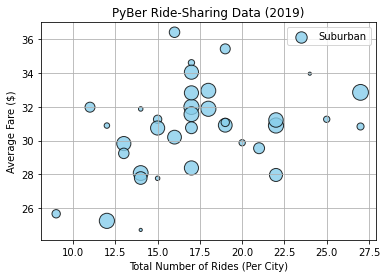

In [25]:
plt.scatter(suburban_ride_count
    , suburban_avg_fare
    , s=10*suburban_driver_count
    , c="skyblue"
    , edgecolor='black'
    , linewidths=1
    , alpha=0.8
    , label="Suburban"
    )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()


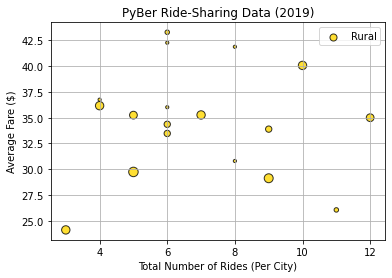

In [26]:
plt.scatter(rural_ride_count
    , rural_avg_fare
    , s=10*rural_driver_count
    , c="gold"
    , edgecolor='black'
    , linewidths=1
    , alpha=0.8
    , label="Rural"
    )
plt.title("PyBer Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.legend()


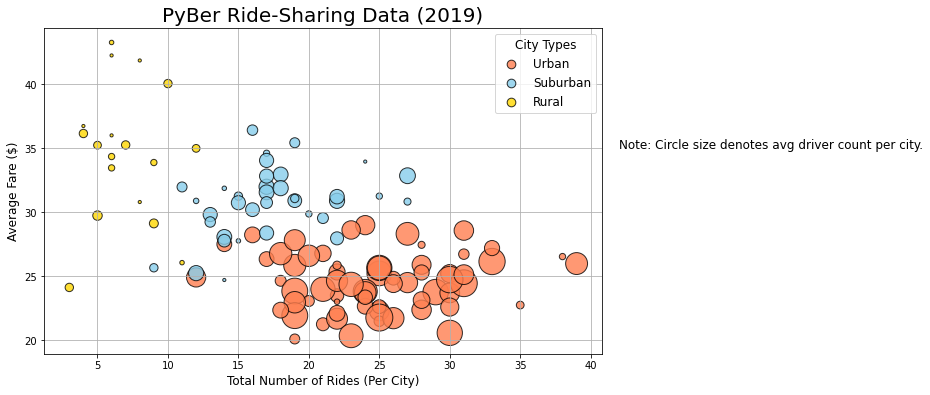

<Figure size 432x288 with 0 Axes>

In [27]:
# Build the Scatter of all 3 plots 

# Adjust the size
plt.subplots(figsize=(10,6))

# Add the 3 plots
plt.scatter(
    urban_ride_count, urban_avg_fare, s=10*urban_driver_count, c="coral", edgecolor='black', linewidths=1, alpha=0.8, label="Urban"
)

plt.scatter(suburban_ride_count, suburban_avg_fare, s=10*suburban_driver_count, c="skyblue", edgecolor='black', linewidths=1, alpha=0.8, label="Suburban"
            )

plt.scatter(rural_ride_count, rural_avg_fare, s=10*rural_driver_count, c="gold", edgecolor='black', linewidths=1, alpha=0.8, label="Rural"
            )

# Add the text and grid
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Create and add the legend
lgnd = plt.legend(fontsize=12
    , mode="Expanded"
    , scatterpoints=1
    , loc="best"
    , title="City Types"
    )
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate Text about circle size
plt.text(42, 35, "Note: Circle size denotes avg driver count per city.", fontsize="12")

plt.show()

plt.savefig("Analysis/Fig1.png")

In [28]:
## 4. Summary Statistics 
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [29]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [30]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [31]:
# Calculate the mean of the ride count for each city type.

round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [32]:
# Find the median of the ride count for each city type.

urban_ride_count.median(), suburban_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [33]:
# Determine the mode of each 
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [34]:
 # Calculate the measures of central tendency for the ride count for the urban cities
 mean_urban_ride_count = np.mean(urban_ride_count)
 median_urban_ride_count = np.median(urban_ride_count)
 mode_urban_ride_count = sts.mode(urban_ride_count)
 print(f"The mean for the ride counts of Urban trips is {mean_urban_ride_count:.2f}.")
 print(f"The mean for the ride counts of Urban trips is {median_urban_ride_count}.")
 print(f"The mean for the ride counts of Urban trips is {mode_urban_ride_count}.")


The mean for the ride counts of Urban trips is 24.62.
The mean for the ride counts of Urban trips is 24.0.
The mean for the ride counts of Urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [35]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
median_suburban_ride_count = np.median(suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mean for the ride counts of Suburban trips is {mean_suburban_ride_count:.2f}.")
print(
    f"The median for the ride counts of Suburban trips is {median_suburban_ride_count:.2f}.")
print(
    f"The mode for the ride counts of Suburban trips is {mode_suburban_ride_count}.")


The mean for the ride counts of Suburban trips is 17.36.
The median for the ride counts of Suburban trips is 17.00.
The mode for the ride counts of Suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [36]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts of Rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts of Rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts of Rural trips is {mode_rural_ride_count}.")


The mean for the ride counts of Rural trips is 6.94.
The median for the ride counts of Rural trips is 6.0.
The mode for the ride counts of Rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [37]:
# Summary Statistics for the Fare by City Type
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
print(urban_fares.head(), suburban_fares.head(), rural_fares.head())

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64 1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64 2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64


In [38]:
# Measures of central tendency for urban trips
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')
print(f'The median fare price for urban trips is $ {median_urban_fares}.')
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $ 24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [39]:
# Measures of central tendency for suburban trips
mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')
print(f'The median fare price for suburban trips is $ {median_suburban_fares}.')
print(f'The mode fare price for suburban trips is ${mode_suburban_fares}.')


The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $ 30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [40]:
# Measures of central tendency for rural trips
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')
print(
    f'The median fare price for rural trips is $ {median_rural_fares}.')
print(f'The mode fare price for rural trips is ${mode_rural_fares}.')


The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $ 37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [41]:
# Summary Statistics for the Number of Drivers by City Type
# Get driver count data from the urban cities 

urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

print(urban_drivers.head(), suburban_drivers.head(), rural_drivers.head())

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64 1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64 2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64


In [42]:
# Measures of central tendency for urban drivers
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

print(f'The mean number of urban drivers is {mean_urban_drivers:.0f}.')
print(f'The median number of urban drivers is {median_urban_drivers}.')
print(f'The mode number of urban drivers is {mode_urban_drivers}.')

# Measures of central tendency for suburban drivers
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

print(f'The mean number of suburban drivers is {mean_suburban_drivers:.0f}.')
print(
    f'The median number of suburban drivers is {median_suburban_drivers}.')
print(f'The mode number of suburban drivers is {mode_suburban_drivers}.')


# Measures of central tendency for rural drivers
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

print(f'The mean number of rural drivers is {mean_rural_drivers:.0f}.')
print(
    f'The median number of rural drivers is {median_rural_drivers}.')
print(f'The mode number of rural drivers is {mode_rural_drivers}.')


The mean number of urban drivers is 37.
The median number of urban drivers is 37.0.
The mode number of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).
The mean number of suburban drivers is 14.
The median number of suburban drivers is 16.0.
The mode number of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).
The mean number of rural drivers is 4.
The median number of rural drivers is 4.0.
The mode number of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


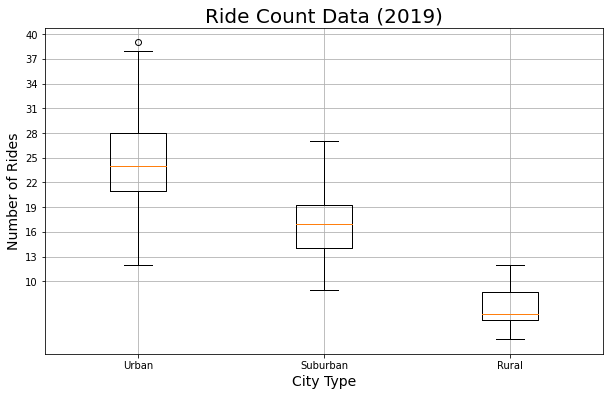

In [43]:
## 8. Create Box and Whisker Plots
# Create box-whisker plots for urban cities ride count
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))


ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_yticks(np.arange(10, 41, step = 3.0))
ax.grid()

plt.savefig("Analysis/Fig2.png")
plt.show()

In [44]:
# Find the city that has the outlier of 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


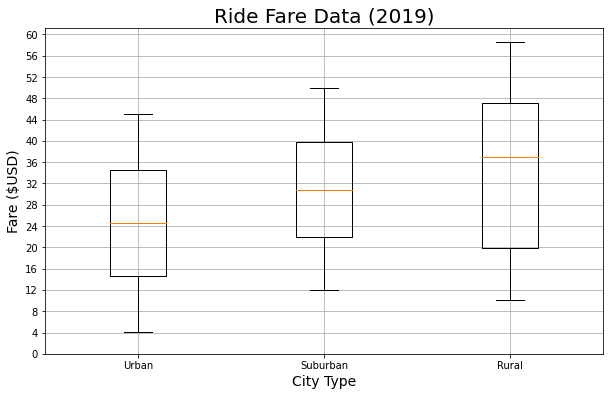

Summary Statistics
count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64
count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64
count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64


In [45]:
# Create a box-and-whimper plot for the FARE data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))


ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_yticks(np.arange(0, 61, step=4.0))
ax.grid()

plt.savefig("Analysis/Fig3.png")
plt.show()

print("Summary Statistics")
print(urban_fares.describe())
print(suburban_fares.describe())
print(rural_fares.describe())

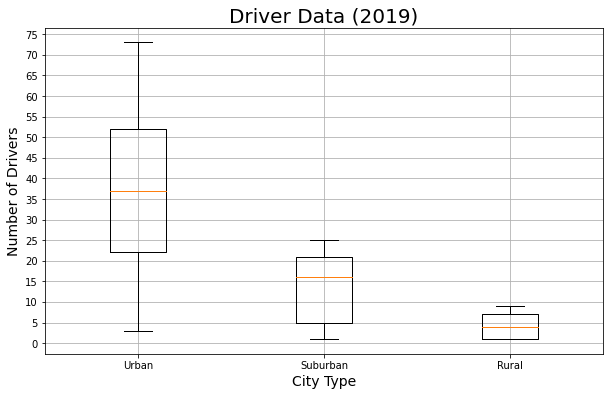

Summary Statistics
count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64
count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64
count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64


In [46]:
# Create a box-and-whimper plot for the Driver data
x_labels = ["Urban", "Suburban", "Rural"]
ride_driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))


ax.set_title("Driver Data (2019)", fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel("City Type", fontsize=14)
ax.boxplot(ride_driver_data, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

plt.savefig("Analysis/Fig4.png")
plt.show()

print("Summary Statistics")
print(urban_drivers.describe())
print(suburban_drivers.describe())
print(rural_drivers.describe())


In [47]:
## 12. Make Pie Charts 
# Get the sum of the fares per city type

# sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
# sum_fares_by_type


In [48]:
# Get sum of all fares

# total_fares = pyber_data_df["fare"].sum()
# total_fares

In [49]:
# Find percentage for each type

# type_percents = 100 * sum_fares_by_type / total_fares
# type_percents

In [50]:
# A better way of doing the above tasks in one step: 

type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

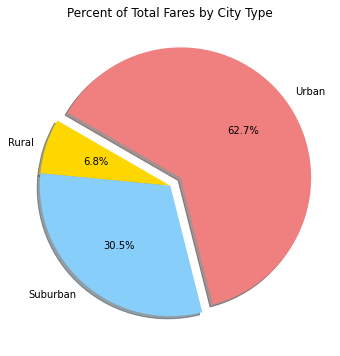

In [51]:
# Build the perecntage of fares by city type pie chart

plt.subplots(figsize=(10,6))

plt.pie(type_percents
    , labels=["Rural", "Suburban", "Urban"]
    , colors=["gold", "lightskyblue", "lightcoral"]
    , explode=[0, 0, 0.1]
    , autopct='%1.1f%%'
    , shadow=True
    , startangle=150
    )

plt.title("Percent of Total Fares by City Type")

# Change default font from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("Analysis/Fig5.png")

# Show the figure
plt.show()

In [52]:
## Make the pie chart for ride percentages
ride_percents = 100 * \
    pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df['ride_id'].count()
ride_percents


type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

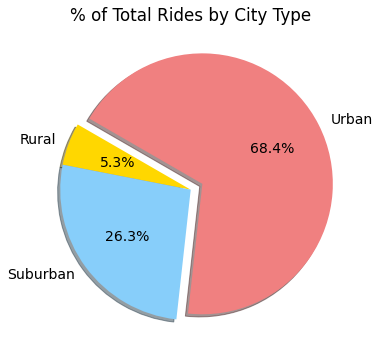

In [55]:
# Build the perecntage of riders by city type pie chart

plt.subplots(figsize=(10, 6))

plt.pie(ride_percents
    , labels=["Rural", "Suburban", "Urban"]
    , colors=["gold", "lightskyblue", "lightcoral"]
    , explode=[0, 0, 0.1]
    , autopct='%1.1f%%'
    , shadow=True
    , startangle=150
    )

plt.title("% of Total Rides by City Type")

# Change default font from 10 to 14
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig("Analysis/Fig6.png")

# Show the figure
plt.show()
